<a href="https://colab.research.google.com/github/AnnaKul5/Machine-learning-and-data-analysis-Master-s-degree/blob/main/MachineLearningProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Содержательное описание задачи

По данным из датасета Forest Cover Type Dataset (https://www.kaggle.com/datasets/uciml/forest-cover-type-dataset/data) необходимо предсказать тип лесного покрова на основе картографических переменных. Район исследования включает в себя четыре территории дикой природы, расположенные в Национальному лесу Рузвельта в Северном Колорадо. Каждое наблюдение - это участок земли размером 30*30 метров.

При этом есть семь типов лесного покрова:

*   Ель / Пихта
* Лоджпол Сосна
*   Сосна Пондероза
*   Коттонвуд / Ива
*   Аспен
*   Пихта Дугласа
*   Круммхольц

Этот набор данных включает в себя информацию о высоте над уровнем моря, наклоне, теневом рельефе, расстоянии до ближайших объектов поверхностных вод, дорог, точек возгорания лесных пожаров, типе почвы и местной топографии.

# Загрузка библиотек

In [1]:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
from matplotlib import rcParams
import warnings

warnings.filterwarnings('ignore')

# Загрузка датасета

In [3]:
data = pd.read_csv("/content/covtype.csv")
data.head(10)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
5,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
6,2606,45,7,270,5,633,222,225,138,6256,...,0,0,0,0,0,0,0,0,0,5
7,2605,49,4,234,7,573,222,230,144,6228,...,0,0,0,0,0,0,0,0,0,5
8,2617,45,9,240,56,666,223,221,133,6244,...,0,0,0,0,0,0,0,0,0,5
9,2612,59,10,247,11,636,228,219,124,6230,...,0,0,0,0,0,0,0,0,0,5


In [4]:
rows, columns = data.shape
print(f"Объём данных: {rows}")
print(f"Количество признаков: {columns}")

Объём данных: 581012
Количество признаков: 55


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

**Набор данных содержит следующие столбцы:**



1.   Elevation - высота над уровнем моря.
2.   Aspect - аспект в градусах азимута.
3.   Slope - уклон в градусах.
4.   Horizontal_Distance_To_Hydrology - расстояние по горизонтали до ближайших объектов поверхностных вод.
5.   Upper_Distance_to_Hygrology - расстояние по вертикали до ближайших объектов поверхностных вод.
6.   Horizontal_Distance_To_Roadways - расстояние по горизонтали до ближайшей дороги.
7.   Hillshade_9am (индекс от 0 до 255) - индекс отмывки (теневой рельеф) в 9 часов утра(летнее солнцестояние).
8.   Hillshade_Noon (индекс от 0 до 255) - индекс отмывки (теневой рельеф) в полдень(летнее солнцестояние).
9.   Hillshade_3pm (индекс от 0 до 255) - индекс отмывки (теневой рельеф) в 15:00(летнее солнцестояние).
10.  Horizontal_Distance_To_Fire_Points - расстояние по горизонтали до ближайших точек возгорания лесных пожаров.
11.  Wilderness_Area (4 бинарных признака) - обозначение территории дикой природы.
12.  Soil_Type (40 бинарных признаков) - обозначение типа почвы.
13.  Cover_Type (7 типов) - обозначение типа лесного покрова. Целевой признак (предсказываемое значение).

Можно отметить, что все признаки являются числовыми.

Также можем увидеть, что отсутствуют пропущенные значения, поскольку все 581012 объектов по всем признакам имеют 581012 non-null значений.

Для достоверности проверим с помошью команды:

In [6]:
data.isnull().sum()

,0
Elevation,0
Aspect,0
Slope,0
Horizontal_Distance_To_Hydrology,0
Vertical_Distance_To_Hydrology,0
Horizontal_Distance_To_Roadways,0
Hillshade_9am,0
Hillshade_Noon,0
Hillshade_3pm,0
Horizontal_Distance_To_Fire_Points,0


При ближайшем рассмотрении понимаем, что в датасете:

*   10 числовых признаков
*   44 бинарных признаков
*   1 категориальный признак (target)







# Числовые признаки

In [7]:
numeric_data = data.iloc[:, :10]
numeric_data.head(10)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
0,2596,51,3,258,0,510,221,232,148,6279
1,2590,56,2,212,-6,390,220,235,151,6225
2,2804,139,9,268,65,3180,234,238,135,6121
3,2785,155,18,242,118,3090,238,238,122,6211
4,2595,45,2,153,-1,391,220,234,150,6172
5,2579,132,6,300,-15,67,230,237,140,6031
6,2606,45,7,270,5,633,222,225,138,6256
7,2605,49,4,234,7,573,222,230,144,6228
8,2617,45,9,240,56,666,223,221,133,6244
9,2612,59,10,247,11,636,228,219,124,6230


# Информация о числовых значениях

In [8]:
numeric_data.describe(include=['int64'])

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000


*   min – минимальное значение признака
*   max – максимальное значение признака
*   mean – среднее значение
*   std – среднеквадратическое отклонение
*   25% – первый квартиль – значение, ниже которого лежит 25% значений
*   50% – медиана – значение, 50% значений меньше которого, а другие 50% больше
*   75% – третий квартиль – значение, ниже которого лежит около 75% значений

  Нет пропущенных значений.

**Построим матрицу корелляции для числовых признаков:**

In [9]:
corrMatrix = numeric_data.select_dtypes(include=['int64']).corr()
corrMatrix.style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
Elevation,1.000000,0.015735,-0.242697,0.306229,0.093306,0.365559,0.112179,0.205887,0.059148,0.148022
Aspect,0.015735,1.000000,0.078728,0.017376,0.070305,0.025121,-0.579273,0.336103,0.646944,-0.109172
Slope,-0.242697,0.078728,1.000000,-0.010607,0.274976,-0.215914,-0.327199,-0.526911,-0.175854,-0.185662
Horizontal_Distance_To_Hydrology,0.306229,0.017376,-0.010607,1.000000,0.606236,0.072030,-0.027088,0.046790,0.052330,0.051874
Vertical_Distance_To_Hydrology,0.093306,0.070305,0.274976,0.606236,1.000000,-0.046372,-0.166333,-0.110957,0.034902,-0.069913
Horizontal_Distance_To_Roadways,0.365559,0.025121,-0.215914,0.072030,-0.046372,1.000000,0.034349,0.189461,0.106119,0.331580
Hillshade_9am,0.112179,-0.579273,-0.327199,-0.027088,-0.166333,0.034349,1.000000,0.010037,-0.780296,0.132669
Hillshade_Noon,0.205887,0.336103,-0.526911,0.046790,-0.110957,0.189461,0.010037,1.000000,0.594274,0.057329
Hillshade_3pm,0.059148,0.646944,-0.175854,0.052330,0.034902,0.106119,-0.780296,0.594274,1.000000,-0.047981
Horizontal_Distance_To_Fire_Points,0.148022,-0.109172,-0.185662,0.051874,-0.069913,0.331580,0.132669,0.057329,-0.047981,1.000000


Сильных зависимостей (больше 0.8) не наблюдается, поэтому о мультиколлинеарности пока говорить не стоит и по умолчанию все числовые переменные будут использованы при построении классифицирующей модели

# Выбросы

array([[<Axes: title={'center': 'Elevation'}>,
        <Axes: title={'center': 'Aspect'}>,
        <Axes: title={'center': 'Slope'}>],
       [<Axes: title={'center': 'Horizontal_Distance_To_Hydrology'}>,
        <Axes: title={'center': 'Vertical_Distance_To_Hydrology'}>,
        <Axes: title={'center': 'Horizontal_Distance_To_Roadways'}>],
       [<Axes: title={'center': 'Hillshade_9am'}>,
        <Axes: title={'center': 'Hillshade_Noon'}>,
        <Axes: title={'center': 'Hillshade_3pm'}>],
       [<Axes: title={'center': 'Horizontal_Distance_To_Fire_Points'}>,
        <Axes: >, <Axes: >]], dtype=object)

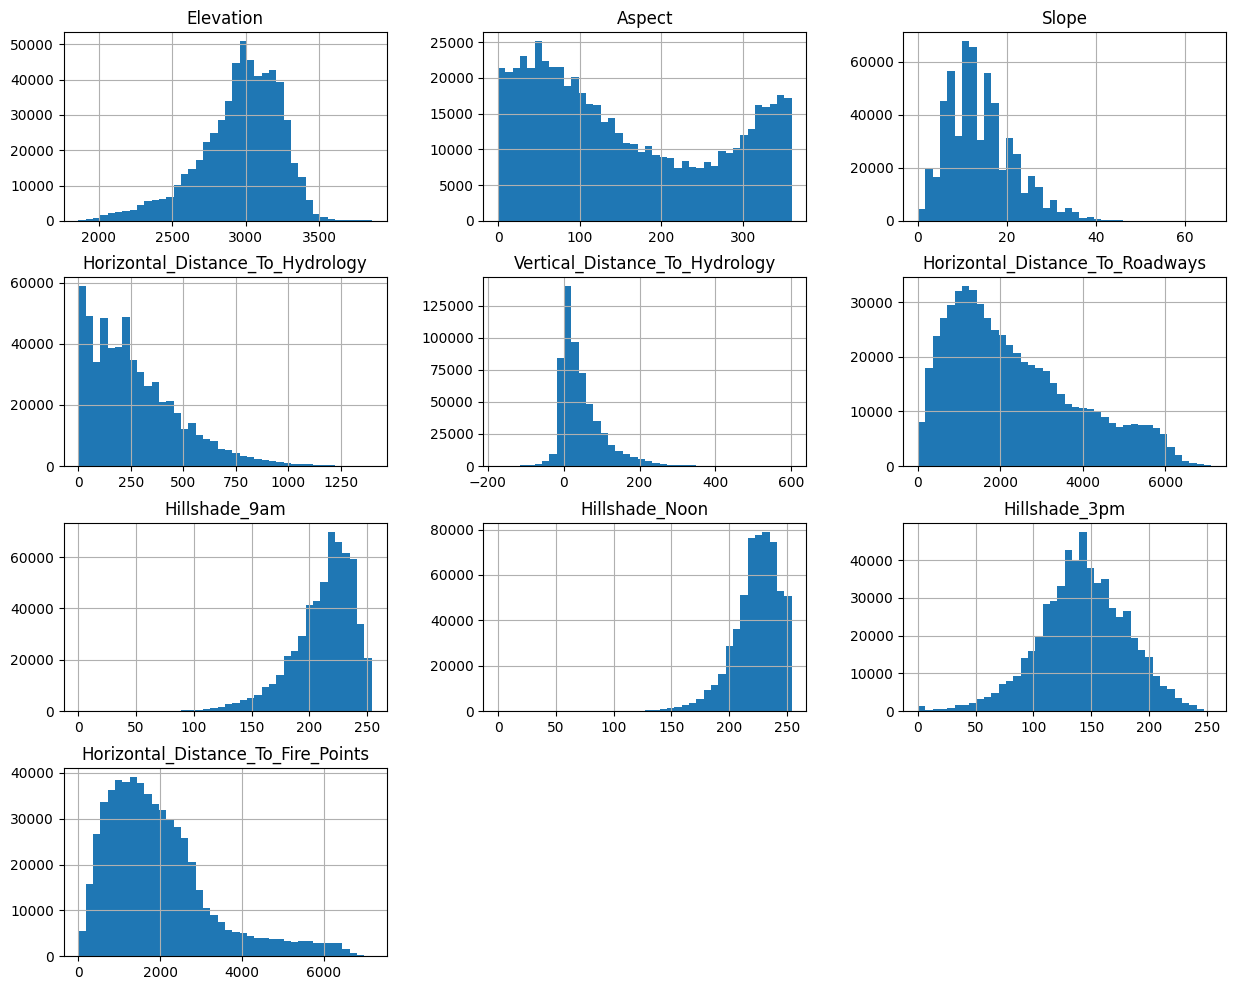

In [10]:
numeric_data.hist(bins=40, figsize=(15,12))

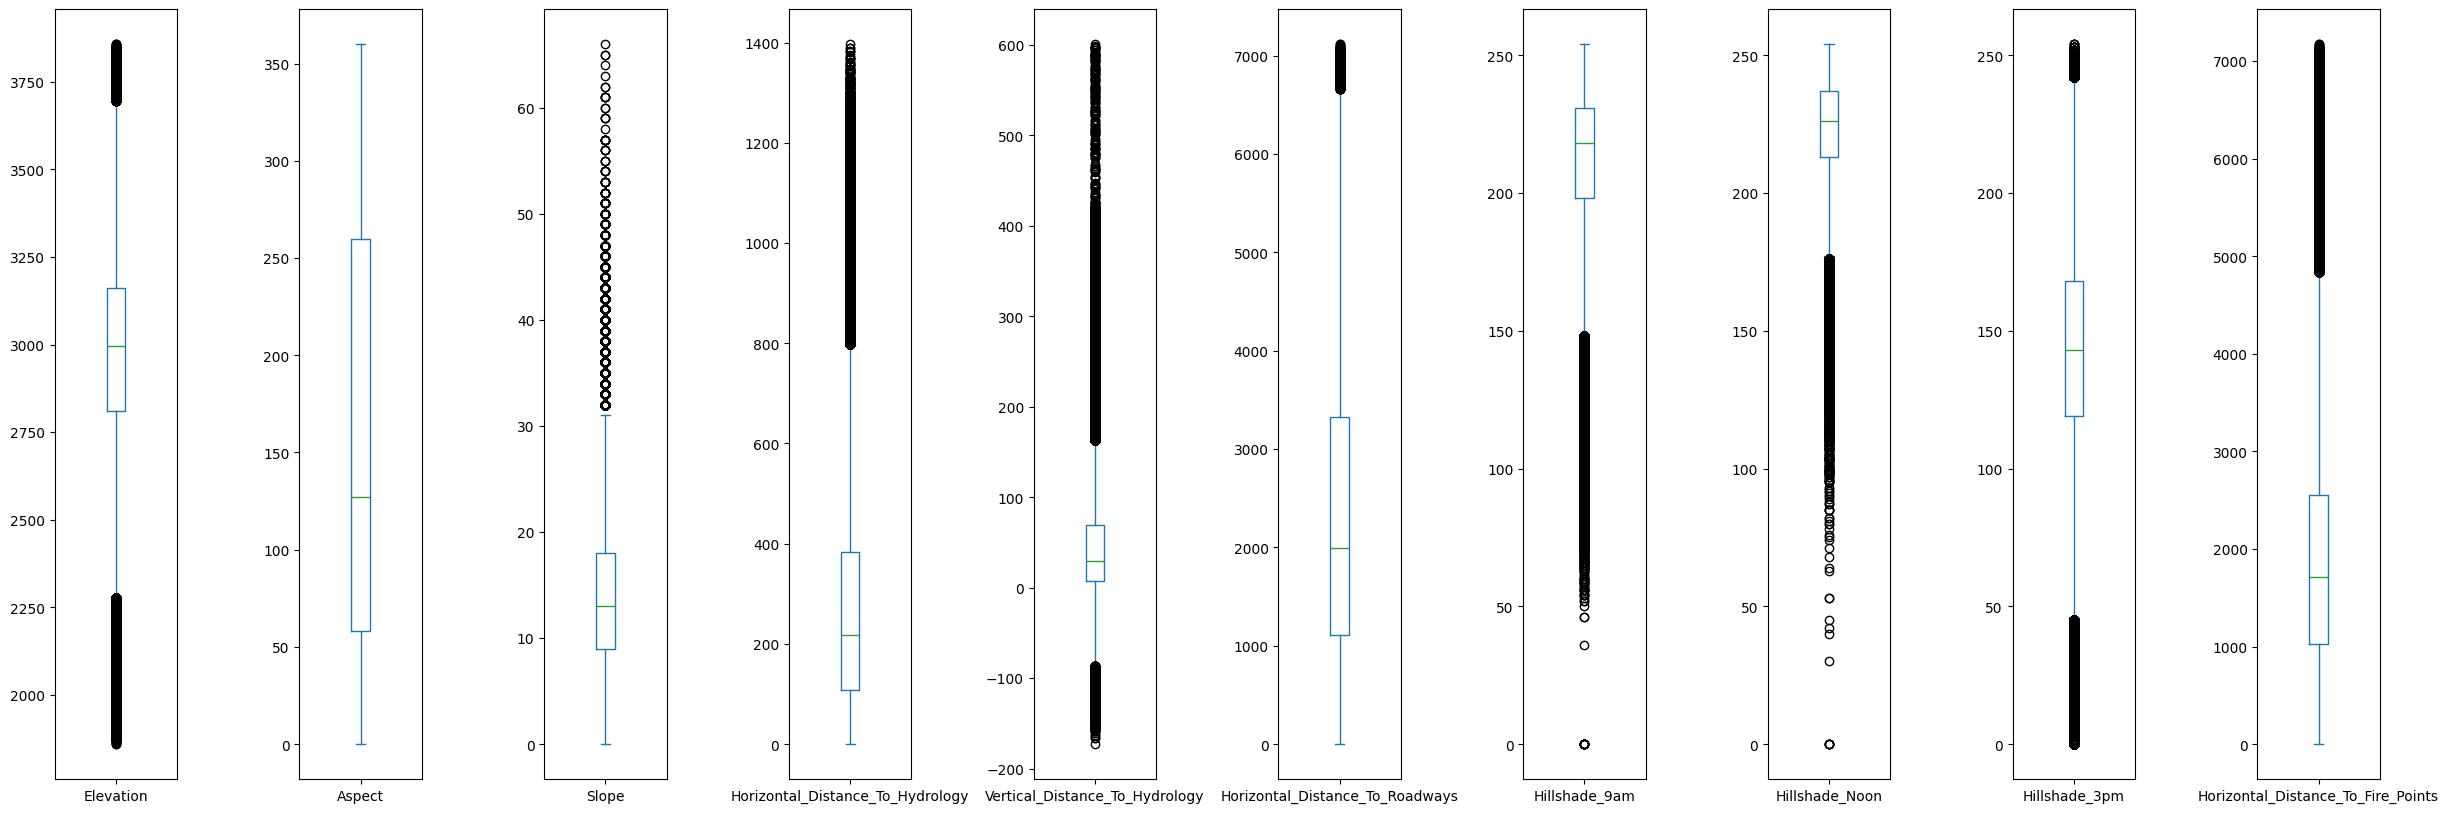

In [11]:
numeric_data.plot(kind='box', subplots=True, sharey=False, figsize=(30, 10))
plt.subplots_adjust(wspace=1)

По "ящикам с усами" видно, что у всех признаков, кроме Aspect, есть выбросы. Рассичитаем их количество для каждого признака:

In [12]:
for column in numeric_data:
    num = data[column]
    Q1 = num.quantile(0.25)
    Q3 = num.quantile(0.75)
    IQR = Q3 - Q1
    out = num[((num < (Q1 - 1.5 * IQR)) | (num > (Q3 + 1.5 * IQR)))]
    print(f'{column : <50}', len(out))

Elevation                                          15569
Aspect                                             0
Slope                                              15316
Horizontal_Distance_To_Hydrology                   14557
Vertical_Distance_To_Hydrology                     31463
Horizontal_Distance_To_Roadways                    669
Hillshade_9am                                      17433
Hillshade_Noon                                     15672
Hillshade_3pm                                      7832
Horizontal_Distance_To_Fire_Points                 31157


Очистим данные от выбросов

In [13]:
for column in numeric_data:
  col = data[column]
  Q1 = col.quantile(0.25)
  Q3 = col.quantile(0.75)
  IQR = Q3 - Q1
  rows_to_drop = col[((col < (Q1 - 1.5 * IQR)) | (col > (Q3 + 1.5 * IQR)))].index
  data.drop(rows_to_drop, inplace=True)

In [14]:
data.shape

(461500, 55)

После очистки осталось около 80% исходных данных

# Информация о бинарных признаках

In [15]:
cat_data = data.drop(["Elevation","Aspect","Slope","Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology",
                      "Horizontal_Distance_To_Roadways","Horizontal_Distance_To_Fire_Points", "Hillshade_9am",
                      "Hillshade_Noon", "Hillshade_3pm"],axis=1)
cat_data.head(10)

,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
11,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
21,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
27,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
35,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
61,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
67,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
71,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
72,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
73,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
75,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [21]:
cat_data.describe()

,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,461500.000000,461500.000000,461500.000000,461500.000000,461500.000000,461500.000000,461500.000000,461500.000000,461500.000000,461500.00000,...,461500.000000,461500.000000,461500.000000,461500.000000,461500.000000,461500.000000,461500.000000,461500.000000,461500.000000,461500.000000
mean,0.461803,0.053798,0.451647,0.032752,0.001174,0.013729,0.005226,0.020947,0.000945,0.01034,...,0.103699,0.067278,0.001961,0.003530,0.000085,0.000553,0.029723,0.022115,0.009879,1.964659
std,0.498539,0.225620,0.497657,0.177987,0.034250,0.116364,0.072105,0.143207,0.030722,0.10116,...,0.304870,0.250504,0.044240,0.059307,0.009192,0.023500,0.169821,0.147057,0.098899,1.336522
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


# Визуализация данных

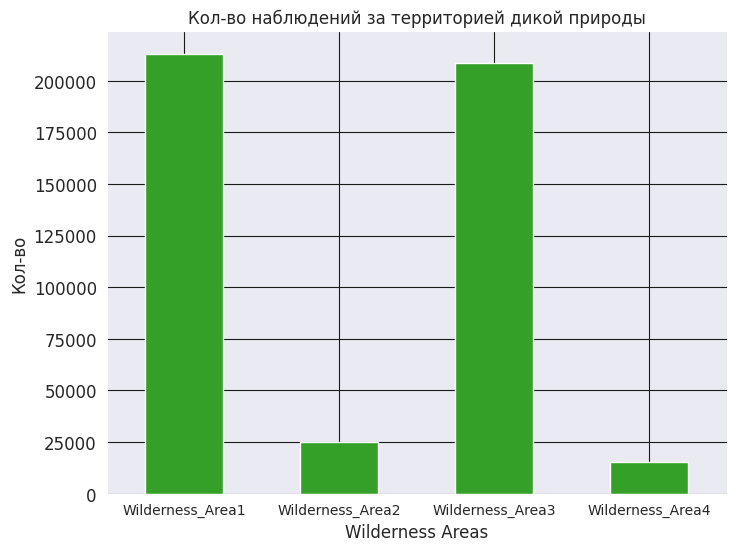

In [ ]:
cat_features = data.iloc[:, 10:-1]
wild_area_data, soil_type_data = cat_features.iloc[:, :4], cat_features.iloc[:, 4:]
sns.set_style("darkgrid", {'grid.color':'.1'})
flatui = ["#e74c3c", "#34495e", "#2ecc71","#3498db"]
palette = sns.color_palette(flatui)
wild_area_data.sum().plot(kind='bar', figsize=(8,6), color='#34a028')
plt.title('Кол-во наблюдений за территорией дикой природы', size=12)
plt.xlabel('Wilderness Areas', size=12)
plt.ylabel('Кол-во', size=12)
plt.xticks(rotation='horizontal', size=10)
plt.yticks(size=12)
sns.despine()
plt.show()

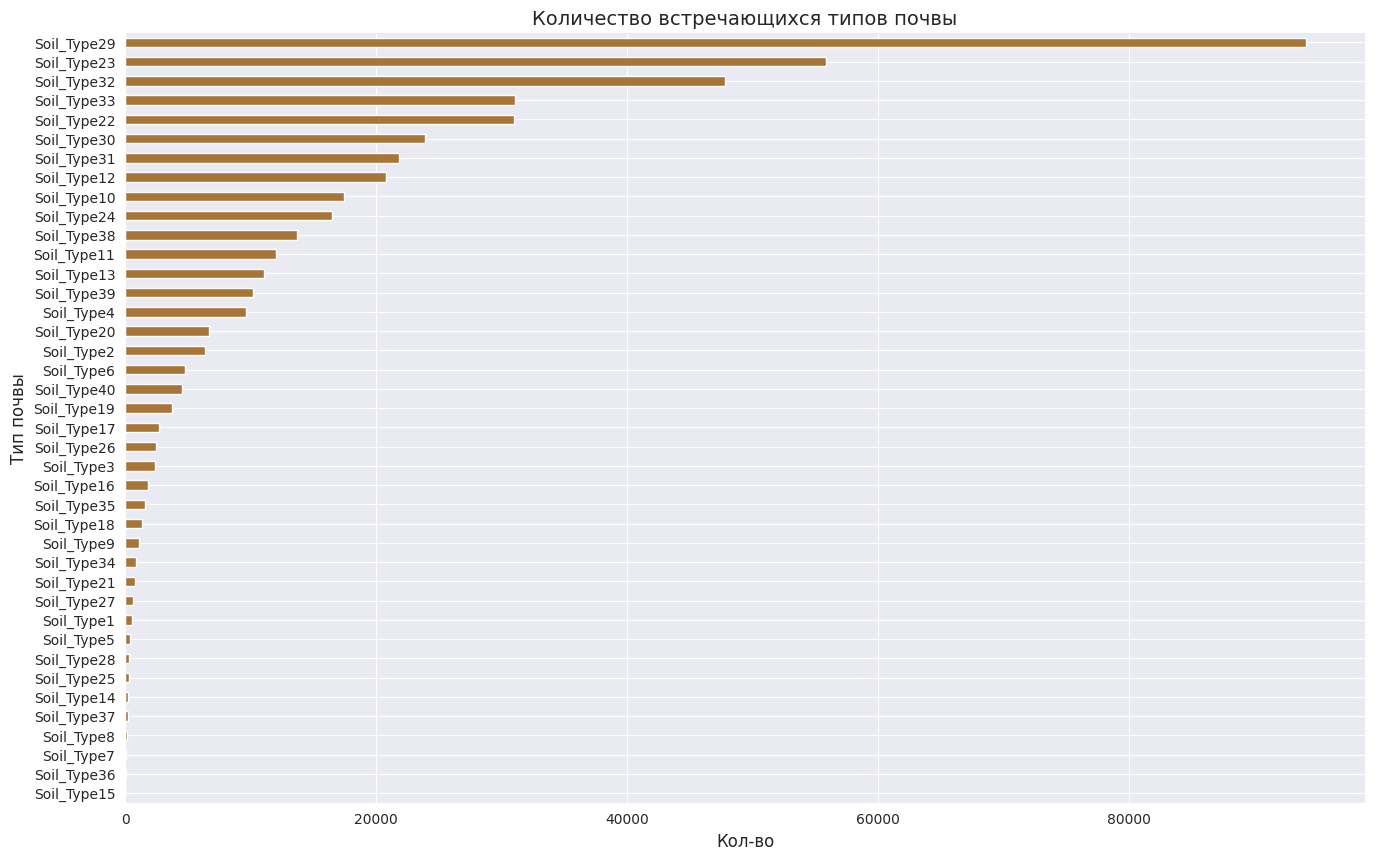

In [ ]:
sns.set_style("darkgrid", {'grid_color': '.1'})
soil_sum = pd.Series(soil_type_data.sum())
soil_sum.sort_values(ascending=False, inplace=True)
soil_sum.plot(kind='barh', figsize=(16,10), color='#a87539')
plt.gca().invert_yaxis()
plt.title('Количество встречающихся типов почвы', size=14)
plt.xlabel('Кол-во', size=12)
plt.ylabel('Тип почвы', size=12)
plt.xticks(rotation='horizontal',size=10)
plt.yticks(size=10)
sns.despine()
plt.show()

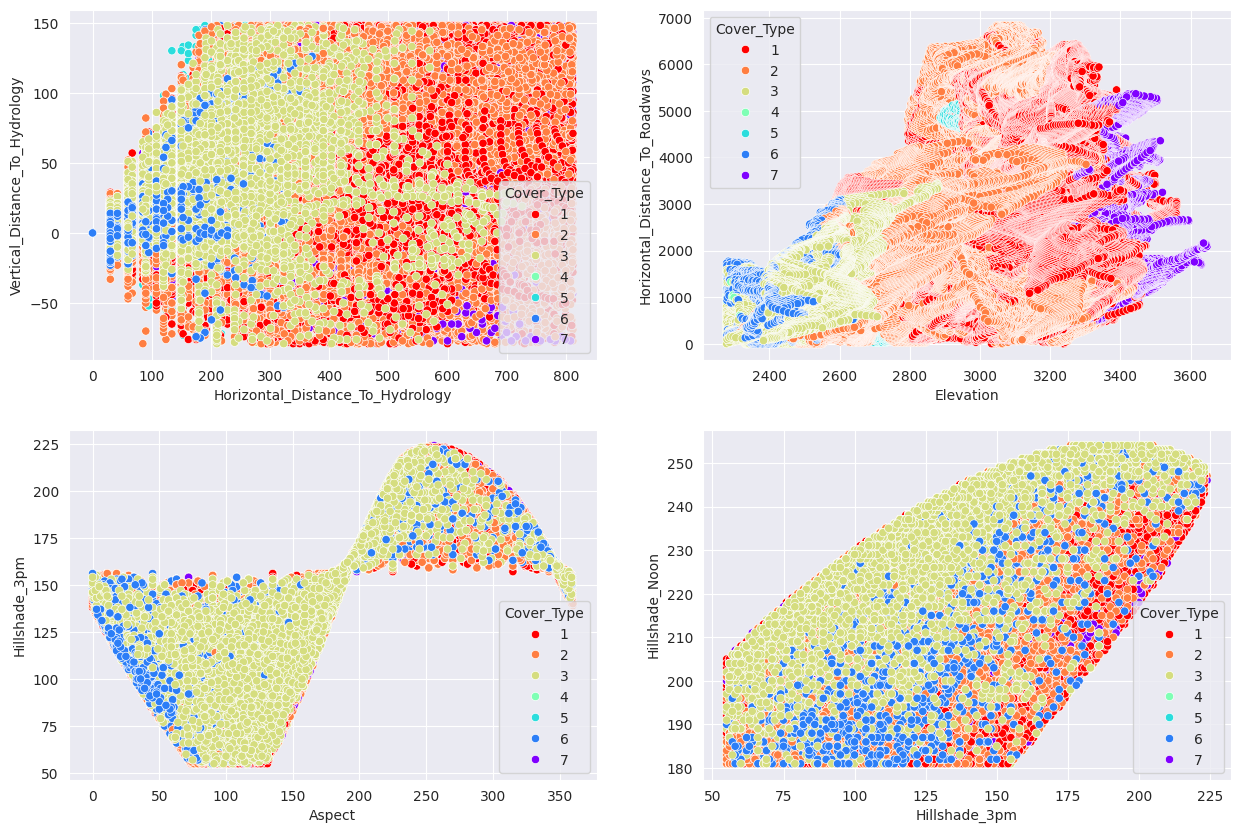

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(15,10))

sns.scatterplot(data=data, x="Horizontal_Distance_To_Hydrology", y="Vertical_Distance_To_Hydrology", hue="Cover_Type", legend='full', palette='rainbow_r', ax=ax[0,0])
sns.scatterplot(data=data, x="Elevation", y="Horizontal_Distance_To_Roadways", hue="Cover_Type", legend='full', palette='rainbow_r', ax=ax[0,1])
sns.scatterplot(data=data, x="Aspect", y="Hillshade_3pm", hue="Cover_Type", legend='full', palette='rainbow_r', ax=ax[1,0])
sns.scatterplot(data=data, x="Hillshade_3pm", y="Hillshade_Noon", hue="Cover_Type", legend='full', palette='rainbow_r', ax=ax[1,1])
plt.show()

# Нормализация

In [ ]:
first_column = data.pop('Cover_Type')
data.insert(0, 'Cover_Type', first_column)

data.head(10)

,Cover_Type,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
11,2,2886,151,11,371,26,5253,234,240,136,...,0,0,0,0,0,0,0,0,0,0
21,2,2880,209,17,216,30,4986,206,253,179,...,0,0,0,0,0,0,0,0,0,0
27,2,2962,148,16,323,23,5916,240,236,120,...,0,0,0,0,0,0,0,0,0,0
35,2,2900,45,19,242,20,5199,221,195,100,...,0,0,0,0,0,0,0,0,0,0
61,2,2952,107,11,42,7,5845,239,226,116,...,0,0,0,0,0,0,0,0,0,0
67,1,2919,13,13,90,6,5321,207,214,142,...,0,0,0,0,0,0,0,0,0,0
71,2,3008,45,14,277,10,6371,223,208,116,...,0,0,0,0,0,0,0,0,0,0
72,2,2893,114,16,108,30,5066,245,223,102,...,0,0,0,0,0,0,0,0,0,0
73,2,2850,6,9,0,0,4858,210,223,151,...,0,0,0,0,0,0,0,0,0,0
75,2,2864,118,18,201,74,4567,248,221,93,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_cat = data.iloc[:, 11:55].values
X_num = data.iloc[:, 1:11].values
y = data.iloc[:, 0].values

Проводим MinMax нормализацию, чтобы все нормируемые переменные были в диапазоне от 0 до 1.

In [ ]:
data.iloc[:, 1:11] = (X_num - X_num.min(axis = 0))/(X_num.max(axis = 0) - X_num.min(axis = 0))
data.iloc[:, 1:11].describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,461500.000000,461500.000000,461500.000000,461500.000000,461500.000000,461500.000000,461500.000000,461500.000000,461500.000000,461500.000000
mean,0.516538,0.424444,0.405755,0.298225,0.495448,0.348528,0.607617,0.617631,0.519936,0.373806
std,0.175901,0.306544,0.189648,0.220318,0.166311,0.226054,0.215647,0.219544,0.190950,0.208184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.409058,0.161111,0.258065,0.116995,0.370044,0.170789,0.469388,0.479452,0.390533,0.213198
50%,0.536888,0.347222,0.387097,0.261084,0.453744,0.297088,0.642857,0.630137,0.520710,0.348832
75%,0.651570,0.688889,0.548387,0.443350,0.590308,0.487487,0.775510,0.780822,0.656805,0.500914
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.iloc[:, 1:11].head(10)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
11,0.444120,0.419444,0.354839,0.456897,0.462555,0.768769,0.795918,0.808219,0.479290,0.822538
21,0.439737,0.580556,0.548387,0.266010,0.480176,0.729694,0.510204,0.986301,0.733728,0.877766
27,0.499635,0.411111,0.516129,0.397783,0.449339,0.865798,0.857143,0.753425,0.384615,0.689340
35,0.454346,0.125000,0.612903,0.298030,0.436123,0.760866,0.663265,0.191781,0.266272,0.835533
61,0.492330,0.297222,0.354839,0.051724,0.378855,0.855408,0.846939,0.616438,0.360947,0.712487
67,0.468225,0.036111,0.419355,0.110837,0.374449,0.778721,0.520408,0.452055,0.514793,0.824365
71,0.533236,0.125000,0.451613,0.341133,0.392070,0.932387,0.683673,0.369863,0.360947,0.616447
72,0.449233,0.316667,0.516129,0.133005,0.480176,0.741402,0.908163,0.575342,0.278107,0.881218
73,0.417823,0.016667,0.290323,0.000000,0.348018,0.710962,0.551020,0.575342,0.568047,0.923452
75,0.428050,0.327778,0.580645,0.247537,0.674009,0.668374,0.938776,0.547945,0.224852,0.984569


Если мы будем использовать классификатор ближайших соседей (knn), то следует учесть, что разные атрибуты обычно обладают разным диапазоном представленных значений в выборке. Значения дистанции могут сильно зависеть от атрибутов с более широкими диапазонами. Поэтому данные обычно подлежат нормализации.

# Разбиение на обучающую и тестовую выборки

In [ ]:
X = np.hstack((X_num, X_cat))
y = data.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Разбили выборку на обучающую, которая составляет 80% от изначальной выборки, и тестовую - 20% от изначальной выборки.

# Дисбаланс классов

In [ ]:
data["Cover_Type"].value_counts()

,count
Cover_Type,
2,228368
1,179390
3,19501
7,15279
6,10967
5,7326
4,669


<Axes: xlabel='Cover_Type', ylabel='count'>

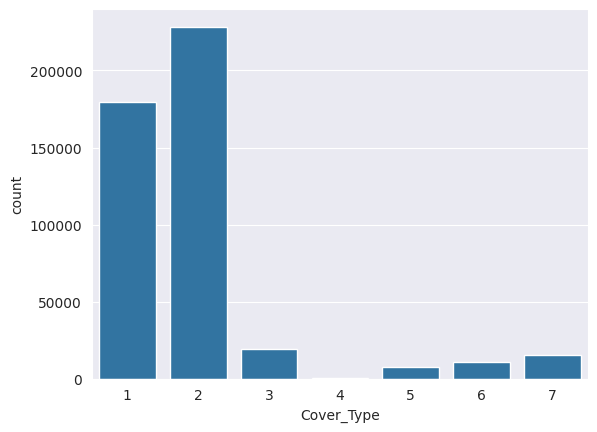

In [ ]:
sns.countplot(data=data, x="Cover_Type")

Из распределения видно, что преобладают лесные покровы 1 и 2 типов, в то время как данных 4 типа очень мало. Это приводит к смещению модели в сторону преобладающих классов.


---



Ввиду дисбаланса классов в качестве основной метрики рассматривается F1-score.

F1-мера - это гармоническое среднее между точностью (precision) и полнотой (recall). Она позволяет учесть как долю правильно классифицированных положительных примеров, так и способность модели обнаруживать все положительные примеры. Точность и полнота, в отличие от меткости, не зависят от соотношения классов и, следовательно, могут применяться в условиях несбалансированных выборок.

# KNN

Для обучающей выборки берём только 20%, так как knn работает достаточно долго

In [ ]:
knn_X_train, _, knn_y_train, _ = train_test_split(X_train, y_train, train_size = 0.2, random_state = 2024, shuffle = True, stratify = y_train)

param_grid = {'n_neighbors': range(5, 31, 5)}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator = knn, param_grid=param_grid, scoring='f1', return_train_score=True)
grid_search.fit(knn_X_train, knn_y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(5, 31, 5)},
             return_train_score=True, scoring='f1')

Получение и вывод лучшего числа ближайших соседей

In [ ]:
best_n_neighbors = grid_search.best_params_['n_neighbors']
print(f"Лучшее число ближайших соседей: {best_n_neighbors}")

Лучшее число ближайших соседей: 5


Обучение модели с лучшими параметрами

In [ ]:
knn_best = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn_best.fit(knn_X_train, knn_y_train)

y_train_pred = knn_best.predict(knn_X_train)
y_test_pred = knn_best.predict(X_test)

Метрики и матрица рассогласования на обучающей выборке

              precision    recall  f1-score   support

           1       0.95      0.95      0.95     28699
           2       0.95      0.96      0.95     36527
           3       0.91      0.92      0.91      3129
           4       0.97      0.56      0.71       106
           5       0.90      0.79      0.84      1171
           6       0.89      0.83      0.86      1763
           7       0.96      0.93      0.94      2445

    accuracy                           0.94     73840
   macro avg       0.93      0.85      0.88     73840
weighted avg       0.94      0.94      0.94     73840



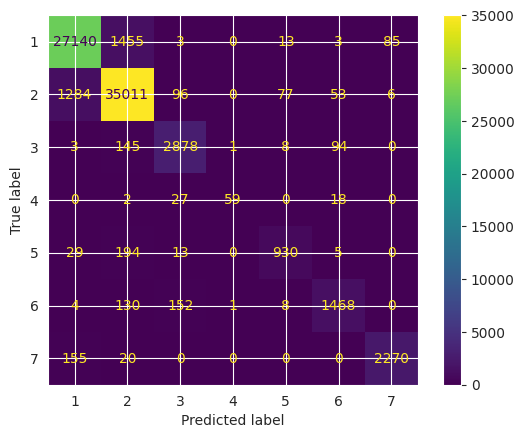

In [ ]:
# Метрики на обучающей выборке
print(classification_report(knn_y_train, y_train_pred, zero_division=0))

# Вывод матрицы рассогласования
cm = confusion_matrix(knn_y_train, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = knn_best.classes_)
disp.plot()
plt.show()

Метрики и матрица рассогласования на тестовой выборке

              precision    recall  f1-score   support

           1       0.90      0.90      0.90     35893
           2       0.91      0.92      0.91     45733
           3       0.84      0.87      0.85      3857
           4       0.71      0.35      0.47       139
           5       0.79      0.65      0.71      1471
           6       0.81      0.73      0.76      2152
           7       0.94      0.88      0.91      3055

    accuracy                           0.90     92300
   macro avg       0.84      0.76      0.79     92300
weighted avg       0.90      0.90      0.90     92300



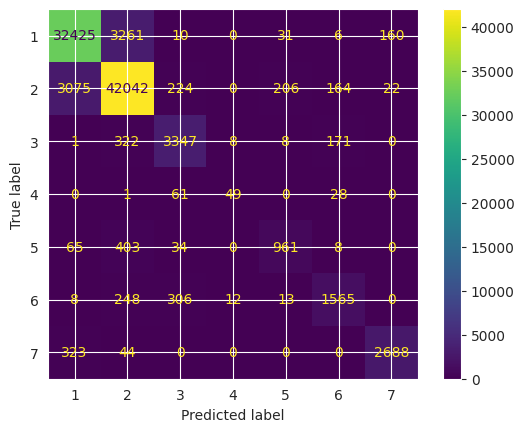

In [ ]:
# Метрики на тестовой выборке
print(classification_report(y_test, y_test_pred, zero_division=0))

# Вывод матрицы рассогласования
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = knn_best.classes_)
disp.plot()
plt.show()

# Логистическая регрессия

In [ ]:
log_reg_X_train, _, log_reg_y_train, _ = train_test_split(X_train, y_train, train_size = 0.2, random_state = 2024, shuffle = True, stratify = y_train)

param_grid = {
    'C': [10**(i-1) for i in range(0, 4)],
    'penalty': ['l1', 'l2'], # Параметр регуляризации
    'solver': ['liblinear']  # Решатель, подходящий для l1 и l2 регуляризации
}

log_reg = LogisticRegression()
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, scoring='f1', return_train_score=True)
grid_search.fit(log_reg_X_train, log_reg_y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             return_train_score=True, scoring='f1')

Получение и вывод лучших параметров

In [ ]:
best_params = grid_search.best_params_
print("Лучшие параметры: ", best_params)

Лучшие параметры:  {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


Обучение модели с лучшими параметрами

In [ ]:
best_log_reg = LogisticRegression(**best_params)
best_log_reg.fit(log_reg_X_train, log_reg_y_train)

y_train_pred = best_log_reg.predict(log_reg_X_train)
y_test_pred = best_log_reg.predict(X_test)

Метрики и матрица рассогласования на обучающей выборке

              precision    recall  f1-score   support

           1       0.70      0.70      0.70     28699
           2       0.73      0.78      0.76     36527
           3       0.62      0.76      0.68      3129
           4       0.00      0.00      0.00       106
           5       0.00      0.00      0.00      1171
           6       0.49      0.26      0.34      1763
           7       0.79      0.41      0.54      2445

    accuracy                           0.71     73840
   macro avg       0.48      0.42      0.43     73840
weighted avg       0.70      0.71      0.70     73840



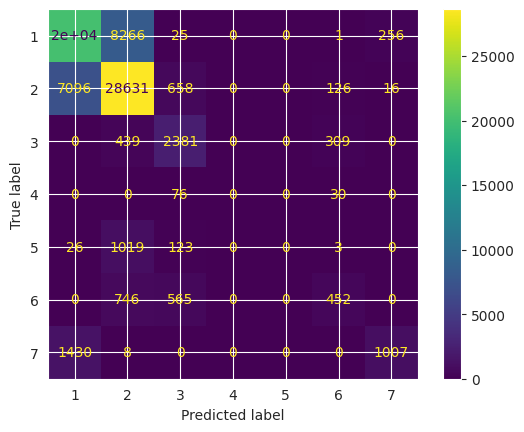

In [ ]:
# Метрики на обучающей выборке
print(classification_report(log_reg_y_train, y_train_pred, zero_division=0))

# Вывод матрицы рассогласования
cm = confusion_matrix(log_reg_y_train, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = best_log_reg.classes_)
disp.plot()
plt.show()

Метрики и матрица рассогласования на тестовой выборке

              precision    recall  f1-score   support

           1       0.70      0.70      0.70     35893
           2       0.73      0.78      0.76     45733
           3       0.61      0.74      0.67      3857
           4       0.00      0.00      0.00       139
           5       0.00      0.00      0.00      1471
           6       0.49      0.26      0.34      2152
           7       0.80      0.42      0.55      3055

    accuracy                           0.71     92300
   macro avg       0.48      0.42      0.43     92300
weighted avg       0.70      0.71      0.70     92300



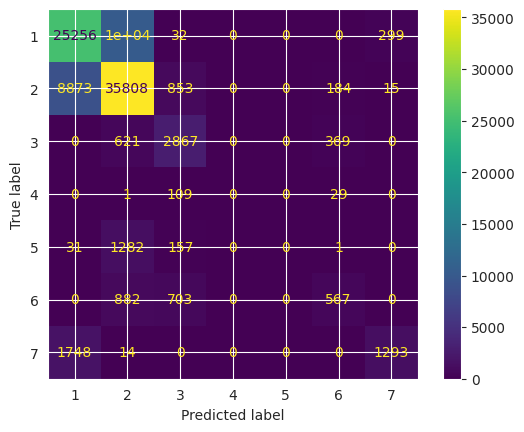

In [ ]:
# Метрики на тестовой выборке
print(classification_report(y_test, y_test_pred, zero_division=0))

# Вывод матрицы рассогласования
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = best_log_reg.classes_)
disp.plot()
plt.show()

# Дерево решений

In [ ]:
param_grid = {
    'max_depth': [10, 15, 20],
}
dtc = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, scoring='f1', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [10, 15, 20]}, return_train_score=True,
             scoring='f1')

Получение и вывод лучшей максимальной глубины дерева

In [ ]:
best_params = grid_search.best_params_
print("Лучшиая глубина: ", best_params)

Лучшиая глубина:  {'max_depth': 10}


Обучение модели с лучшими параметрами

In [ ]:
best_dtc_model = DecisionTreeClassifier(**best_params)
best_dtc_model.fit(X_train, y_train)

y_train_pred = best_dtc_model.predict(X_train)
y_test_pred = best_dtc_model.predict(X_test)

Метрики и матрица рассогласования на обучающей выборке

              precision    recall  f1-score   support

           1       0.79      0.77      0.78    143497
           2       0.79      0.84      0.82    182635
           3       0.84      0.76      0.80     15644
           4       0.67      0.41      0.51       530
           5       0.65      0.20      0.30      5855
           6       0.71      0.54      0.61      8815
           7       0.84      0.75      0.79     12224

    accuracy                           0.79    369200
   macro avg       0.76      0.61      0.66    369200
weighted avg       0.79      0.79      0.79    369200



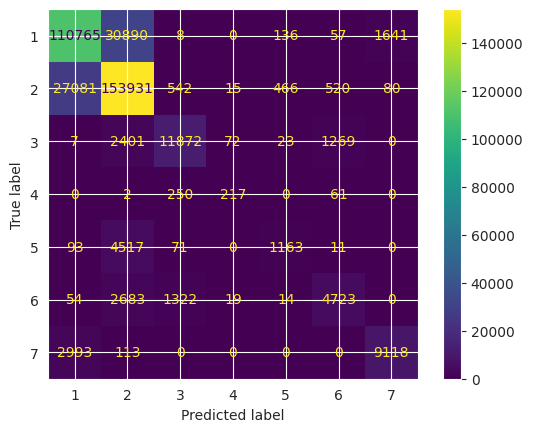

In [ ]:
# Метрики на обучающей выборке
print(classification_report(y_train, y_train_pred, zero_division=0))

# Вывод матрицы рассогласования
cm = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = best_dtc_model.classes_)
disp.plot()
plt.show()

Метрики и матрица рассогласования на тестовой выборке

              precision    recall  f1-score   support

           1       0.78      0.77      0.78     35893
           2       0.79      0.84      0.81     45733
           3       0.82      0.74      0.78      3857
           4       0.52      0.32      0.40       139
           5       0.57      0.18      0.27      1471
           6       0.67      0.51      0.58      2152
           7       0.82      0.74      0.78      3055

    accuracy                           0.78     92300
   macro avg       0.71      0.58      0.63     92300
weighted avg       0.78      0.78      0.78     92300



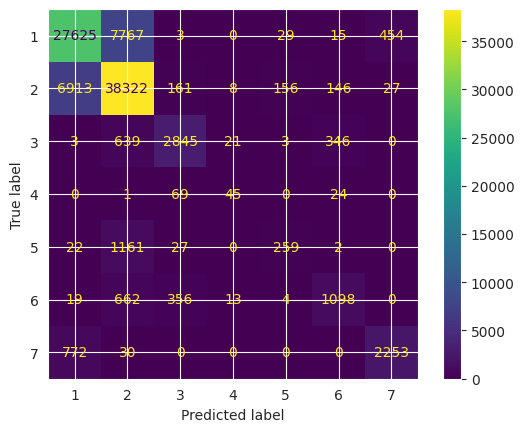

In [ ]:
# Метрики на обучающей выборке
print(classification_report(y_test, y_test_pred, zero_division=0))

# Вывод матрицы рассогласования
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = best_dtc_model.classes_)
disp.plot()
plt.show()

# Борьба с несбалонсированностью классов (дерево решений)

**Взвешивание классов**

Принцип работы взвешивания классов заключается в присвоении разных весов каждому классу в зависимости от его доли в данных. Это позволяет модели лучше справляться с классом-меньшинством.

In [ ]:
balanced_dtc = DecisionTreeClassifier(**best_params, class_weight='balanced')
balanced_dtc.fit(X_train, y_train)

y_train_pred = balanced_dtc.predict(X_train)
y_test_pred = balanced_dtc.predict(X_test)

Метрики и матрица рассогласования на обучающей выборке

              precision    recall  f1-score   support

           1       0.74      0.71      0.73    143497
           2       0.82      0.57      0.67    182635
           3       0.70      0.72      0.71     15644
           4       0.38      0.98      0.54       530
           5       0.12      0.90      0.21      5855
           6       0.44      0.85      0.58      8815
           7       0.50      0.95      0.66     12224

    accuracy                           0.66    369200
   macro avg       0.53      0.81      0.58    369200
weighted avg       0.75      0.66      0.69    369200



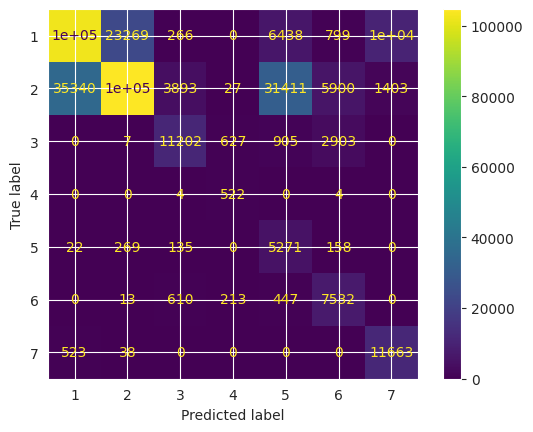

In [ ]:
# Метрики на обучающей выборке
print(classification_report(y_train, y_train_pred, zero_division=0))

# Вывод матрицы рассогласования
cm = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = balanced_dtc.classes_)
disp.plot()
plt.show()

Метрики и матрица рассогласования на тестовой выборке

              precision    recall  f1-score   support

           1       0.74      0.71      0.72     35893
           2       0.81      0.57      0.67     45733
           3       0.67      0.71      0.69      3857
           4       0.34      0.84      0.48       139
           5       0.12      0.89      0.21      1471
           6       0.43      0.83      0.56      2152
           7       0.49      0.94      0.64      3055

    accuracy                           0.65     92300
   macro avg       0.51      0.78      0.57     92300
weighted avg       0.74      0.65      0.68     92300



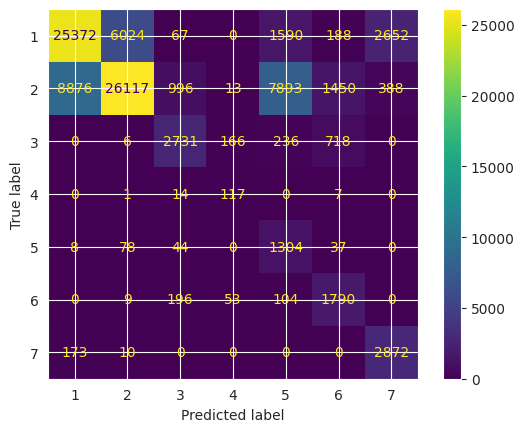

In [ ]:
# Метрики на обучающей выборке
print(classification_report(y_test, y_test_pred, zero_division=0))

# Вывод матрицы рассогласования
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = balanced_dtc.classes_)
disp.plot()
plt.show()

# Случайный лес


In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 15, 20],
}

rfc = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring='f1', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 15, 20],
                         'n_estimators': [100, 200, 300, 400]},
             return_train_score=True, scoring='f1')

Получение и вывод лучших параметров

In [ ]:
best_params = grid_search.best_params_
print("Лучшиие параметры: ", best_params)

Лучшиие параметры:  {'max_depth': 10, 'n_estimators': 100}


Обучение модели с лучшими параметрами

In [ ]:
best_rfc_model = RandomForestClassifier(**best_params)
best_rfc_model.fit(X_train, y_train)

y_train_pred = best_rfc_model.predict(X_train)
y_test_pred = best_rfc_model.predict(X_test)

Метрики и матрица рассогласования на обучающей выборке

              precision    recall  f1-score   support

           1       0.74      0.77      0.75    143497
           2       0.76      0.81      0.79    182635
           3       0.82      0.79      0.81     15644
           4       0.99      0.13      0.23       530
           5       1.00      0.00      0.00      5855
           6       0.83      0.36      0.51      8815
           7       0.99      0.50      0.66     12224

    accuracy                           0.76    369200
   macro avg       0.87      0.48      0.53    369200
weighted avg       0.77      0.76      0.75    369200



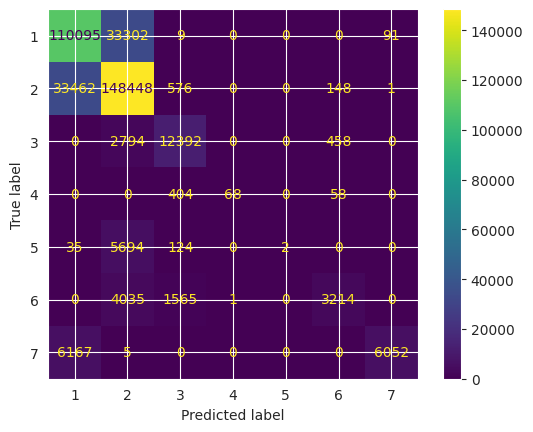

In [ ]:
# Метрики на обучающей выборке
print(classification_report(y_train, y_train_pred, zero_division=0))

# Вывод матрицы рассогласования
cm = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = best_rfc_model.classes_)
disp.plot()
plt.show()

Метрики и матрица рассогласования на тестовой выборке

              precision    recall  f1-score   support

           1       0.73      0.76      0.75     35893
           2       0.76      0.81      0.78     45733
           3       0.79      0.78      0.78      3857
           4       0.90      0.06      0.12       139
           5       0.00      0.00      0.00      1471
           6       0.80      0.33      0.47      2152
           7       0.98      0.48      0.65      3055

    accuracy                           0.75     92300
   macro avg       0.71      0.46      0.51     92300
weighted avg       0.75      0.75      0.74     92300



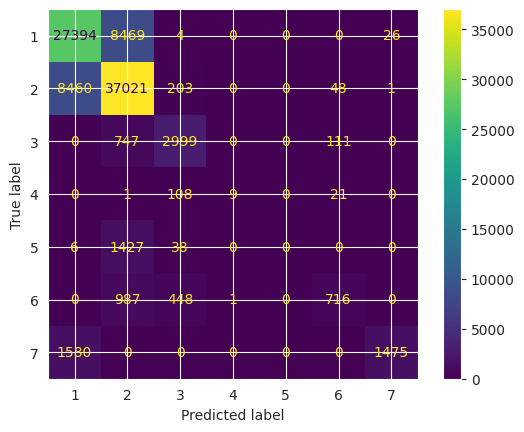

In [ ]:
# Метрики на обучающей выборке
print(classification_report(y_test, y_test_pred, zero_division=0))

# Вывод матрицы рассогласования
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = best_rfc_model.classes_)
disp.plot()
plt.show()

# Борьба с несбалансированностью классов (случайный лес)

In [ ]:
balanced_rfc = RandomForestClassifier(**best_params, class_weight='balanced')
balanced_rfc.fit(X_train, y_train)

y_train_pred = balanced_rfc.predict(X_train)
y_test_pred = balanced_rfc.predict(X_test)

Метрики и матрица рассогласования на обучающей выборке

              precision    recall  f1-score   support

           1       0.70      0.77      0.73    143497
           2       0.87      0.52      0.65    182635
           3       0.68      0.78      0.73     15644
           4       0.28      0.99      0.43       530
           5       0.13      0.91      0.22      5855
           6       0.46      0.86      0.60      8815
           7       0.49      0.95      0.65     12224

    accuracy                           0.66    369200
   macro avg       0.52      0.83      0.57    369200
weighted avg       0.76      0.66      0.68    369200



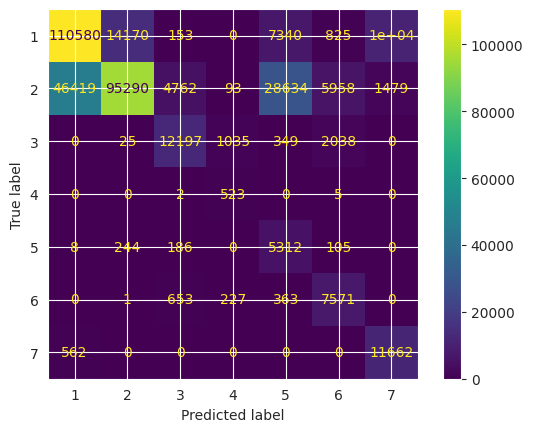

In [ ]:
# Метрики на обучающей выборке
print(classification_report(y_train, y_train_pred, zero_division=0))

# Вывод матрицы рассогласования
cm = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = balanced_rfc.classes_)
disp.plot()
plt.show()

Метрики и матрица рассогласования на тестовой выборке

              precision    recall  f1-score   support

           1       0.70      0.76      0.73     35893
           2       0.86      0.52      0.65     45733
           3       0.66      0.77      0.71      3857
           4       0.27      0.91      0.42       139
           5       0.13      0.89      0.22      1471
           6       0.44      0.83      0.57      2152
           7       0.48      0.94      0.64      3055

    accuracy                           0.65     92300
   macro avg       0.51      0.80      0.56     92300
weighted avg       0.76      0.65      0.67     92300



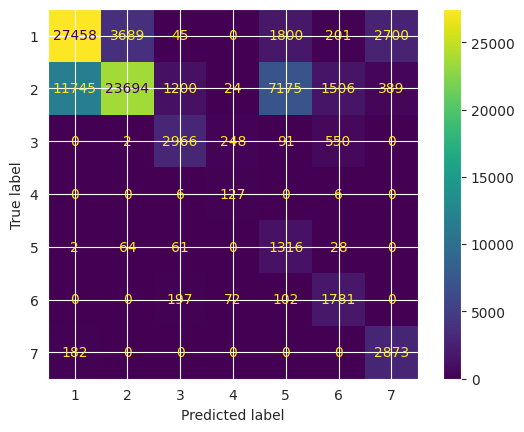

In [ ]:
# Метрики на обучающей выборке
print(classification_report(y_test, y_test_pred, zero_division=0))

# Вывод матрицы рассогласования
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = balanced_rfc.classes_)
disp.plot()
plt.show()

# Итог

In [ ]:
models = [knn_best, best_log_reg, best_dtc_model, balanced_dtc, best_rfc_model, balanced_rfc]
metrics = []
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    current_model_metrics = [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='weighted'),
                             recall_score(y_test, y_pred, average='weighted'), f1_score(y_test, y_pred, average='weighted')]
    metrics.append(current_model_metrics)

In [ ]:
df_metrics = pd.DataFrame(metrics)
df_metrics.columns = ["accuracy", "precision", "recall", "f1-score"]
df_metrics.index = ["KNN", "Log Reg", "Decision Tree", "Balanced Decision Tree", "Random Forest", "Balanced Random Forest"]
df_metrics

,accuracy,precision,recall,f1-score
KNN,0.965959,0.965883,0.965959,0.965888
Log Reg,0.712665,0.700809,0.712665,0.703216
Decision Tree,0.784897,0.781927,0.784897,0.780870
Balanced Decision Tree,0.653337,0.744493,0.653337,0.679765
Random Forest,0.752579,0.761664,0.752579,0.742725
Balanced Random Forest,0.659177,0.755542,0.659177,0.679622


В результате, мы можем увидеть, что лучшие результаты показывает классификатор KNN. Это может быть связано со спецификой данных. При их визуализации мы могли видеть, что типы лесного покрова напрямую зависят от геолокации. Также объекты с одинаковым типом лесного покрова расологаются достаточно близко, соседствуют друг с другом.

С помощью балансировки классов в дереве решений и случайном лесе хотя и удалось достичь повышения метрик для наименее встречающихся классов, но общие показатели снизились.